In [518]:
import pandas as pd
import seaborn as sns

# Steps

## Config

In [520]:
from sklearn import set_config
# this code will make it so that whenever we transform data the output is a data frame
set_config(transform_output='pandas')

In [521]:
# First Try with Titanic Dataset
url = "https://drive.google.com/file/d/1g3uhw_y3tboRm2eYDPfUzXXsw8IOYDCy/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

data1 = pd.read_csv(path)
data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [522]:
data1.Survived.value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [ ]:
data2 = pd.read_csv("houses_class_2.csv")
data3 = pd.read_csv("houses_class_3.csv")
data4 = pd.read_csv("houses_class_4.csv")
data5 = pd.read_csv("houses_class_5.csv")

## Target and Column Analysis

In [524]:
# X and y creation
x1 = data1.drop(columns=["PassengerId", "Name", "Ticket"])
y1 = x1.pop("Survived")

In [525]:
#sns.pairplot(data1);

In [526]:
# In data2 no column needs to be dropped
x2 = data2
y2 = x2.pop("Expensive")

In [527]:
data3

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
0,8450,65.0,856,3,0,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
1,9600,80.0,1262,3,1,0,2,298,0,0,RL,Feedr,GasA,Pave,Y,CBlock
2,11250,68.0,920,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
3,9550,60.0,756,3,1,0,3,0,0,0,RL,Norm,GasA,Pave,Y,BrkTil
4,14260,84.0,1145,4,1,0,3,192,0,0,RL,Norm,GasA,Pave,Y,PConc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
1456,13175,85.0,1542,3,2,0,2,349,0,0,RL,Norm,GasA,Pave,Y,CBlock
1457,9042,66.0,1152,4,2,0,1,0,0,1,RL,Norm,GasA,Pave,Y,Stone
1458,9717,68.0,1078,2,0,0,1,366,0,0,RL,Norm,GasA,Pave,Y,CBlock


In [528]:
# X and y creation
# We drop the string column which cannot be transformed into 1 and 0
x3 = data3.drop(columns=["MSZoning", "Condition1", "Heating", "Foundation"])
y3 = x3.pop("Expensive")

In [529]:
x3.loc[x3["Street"] == "Pave", "Street"] = 1
x3.loc[x3["Street"] == "Grvl", "Street"] = 0

x3.loc[x3["CentralAir"] == "Y", "CentralAir"] = 1
x3.loc[x3["CentralAir"] == "N", "CentralAir"] = 0

In [530]:
# X and y creation
x4 = data4
y4 = x4.pop("Expensive")

In [531]:
categorical_columns = x4.select_dtypes(exclude="number").columns

In [532]:
for column in categorical_columns:
    print(f'there are {data4[column].nunique()} categories in column {column}')

there are 5 categories in column MSZoning
there are 9 categories in column Condition1
there are 6 categories in column Heating
there are 2 categories in column Street
there are 2 categories in column CentralAir
there are 6 categories in column Foundation
there are 4 categories in column ExterQual
there are 5 categories in column ExterCond
there are 4 categories in column BsmtQual
there are 4 categories in column BsmtCond
there are 4 categories in column BsmtExposure
there are 6 categories in column BsmtFinType1
there are 4 categories in column KitchenQual
there are 5 categories in column FireplaceQu


<Axes: xlabel='Condition1', ylabel='Count'>

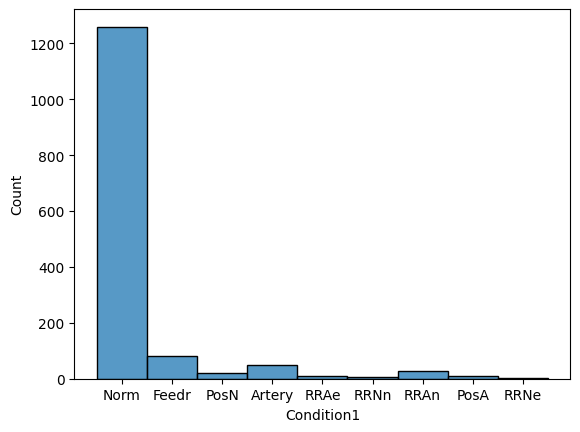

In [533]:
import seaborn as sns
sns.histplot(data4, x="Condition1")

In [607]:
# X and y creation
x5 = data5
y5 = x5.pop("Expensive")

## Test Split

In [534]:
from sklearn.model_selection import train_test_split

In [535]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=31416)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(712, 8)
(179, 8)
(712,)
(179,)


In [536]:
train_data = X_train1.copy()
train_data['Survived'] = y_train1

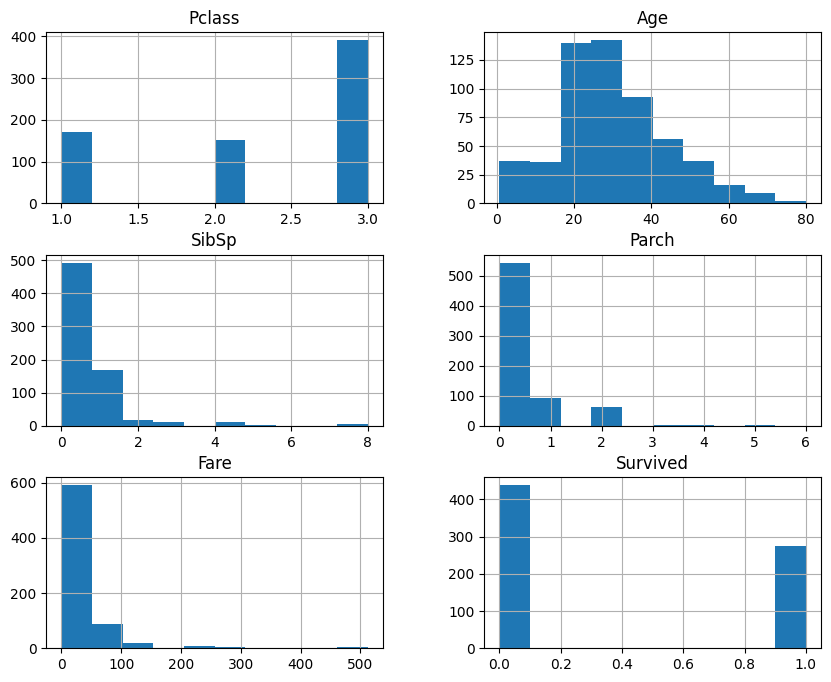

In [537]:
train_data.hist(figsize=(10, 8));

In [538]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=123)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(1168, 9)
(292, 9)
(1168,)
(292,)


In [539]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=123)
print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(1168, 11)
(292, 11)
(1168,)
(292,)


In [540]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.2, random_state=123)
print(X_train4.shape)
print(X_test4.shape)
print(y_train4.shape)
print(y_test4.shape)

(1168, 23)
(292, 23)
(1168,)
(292,)


## Clean-up

In [541]:
from sklearn.impute import SimpleImputer

In [542]:
# 1. initialize
my_imputer = SimpleImputer()
# 2. use fit on the train set
my_imputer.fit(X_train2)
# 3. use transform on the train set
X_imputed_train2 = my_imputer.transform(X_train2)

In [543]:
X_imputed_train2.isnull().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

In [544]:
# 1. initialize
my_imputer = SimpleImputer()
# 2. use fit on the train set
my_imputer.fit(X_test2)
# 3. use transform on the train set
X_imputed_test2 = my_imputer.transform(X_test2)

In [545]:
my_imputer.statistics_

array([1.11720034e+04, 7.21036036e+01, 1.04259589e+03, 2.84589041e+00,
       6.43835616e-01, 0.00000000e+00, 1.79794521e+00, 8.28664384e+01,
       1.82500000e+01])

In [546]:
my_imputer = SimpleImputer() # initialise
my_imputer.fit(X_train3) # fit on the train set
X_imputed_train3 = my_imputer.transform(X_train3) # transform the train set
X_imputed_test3 = my_imputer.transform(X_test3) # transform the test set

my_imputer.statistics_

array([1.03530342e+04, 6.95842697e+01, 1.06113784e+03, 2.87157534e+00,
       6.05308219e-01, 3.44863014e+00, 1.75941781e+00, 9.70890411e+01,
       1.42636986e+01, 9.94863014e-01, 9.34931507e-01])

In [547]:
# selecting non-numerical columns
X_train_cat4 = X_train4.select_dtypes(exclude="number")

# defining the imputer to use "N_A" as replacement value
cat_imputer = SimpleImputer(strategy="constant",
                            fill_value="N_A")

# fitting and transforming
X_cat_imputed4 = cat_imputer.fit_transform(X_train_cat4)

In [548]:
# Selecting numerical columns
X_train_num4 = X_train4.select_dtypes(include="number")

# Imputing the mean
num_imputer = SimpleImputer(strategy="mean")

# Fitting and transforming
X_num_imputed4 = num_imputer.fit_transform(X_train_num4)

## OneHotEncoder

In [549]:
from sklearn.preprocessing import OneHotEncoder

In [550]:
# initialize
my_onehot = OneHotEncoder(sparse_output=False,
                          handle_unknown='ignore')

# fit
my_onehot.fit(X_cat_imputed4)

# transform
X_cat_imputed_onehot = my_onehot.transform(X_cat_imputed4)

In [551]:
X_imputed = pd.concat([X_cat_imputed_onehot, X_num_imputed4], axis=1)

## OrdinalEncoder

In [608]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [609]:
num_feat = x5.select_dtypes(include="number").columns
num_imputer = SimpleImputer(strategy="mean")
num_pipe = make_pipeline(num_imputer)

In [610]:
cat_imputer = SimpleImputer(strategy='constant', fill_value='N_A')
oh_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [ ]:
# Identify which columns you want to ordinally encode
# ord_feat = ["Cabin"]

# Create ordered lists for each of the ordinal features. Make sure to include the fill_value option
# cabin_cats = ["N_A", "G", "F", "E", "D", "C", "B", "A", "T"]

# Create a list of the ordered lists
# categories = [cabin_cats]

# Initialize encoder
# ord_encoder = OrdinalEncoder(categories=categories)

In [ ]:
# cat_feat = x4.select_dtypes(exclude="number").columns
# oh_feat = list(set(cat_feat) - set(ord_feat))

# encoder = make_column_transformer(
#     (ord_encoder, ord_feat),
#     (oh_encoder, oh_feat)
# )

In [ ]:
# cat_pipe = make_pipeline(
#     cat_imputer,
#     encoder
# )

In [ ]:
# preprocessor = make_column_transformer(
#     (num_pipe, num_feat),
#     (cat_pipe, cat_feat)
# )
# preprocessor

In [ ]:
# full pipeline: preprocessor + model
# dt_pipe = make_pipeline(preprocessor,
#                         DecisionTreeClassifier())

# define parameter grid
# param_grid = {
#     "columntransformer__pipeline-1__simpleimputer__strategy":["mean", "median"],
#     "decisiontreeclassifier__max_depth": range(2, 14, 2),
#     "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
# }

# define GridSearchCV
# search = GridSearchCV(dt_pipe,
#                       param_grid,
#                       cv=5,
#                       verbose=1)

# search.fit(X_train, y_train)

# search.best_score_

## Dummy Model

Dummy Models are good for setting a baseline. They are quick and without too much effort.<br><br>
Setting a baseline doesn't just help us evaluate the model, it also helps us evaluate whether machine-learning is necessary in the first place. Machine learning models shouldn't be the first option to solve every problem. Machine learning adds complexity to a business, and it should only be implemented if it represents a clear advantage compared to a simple working solution that the company can build following simple rules, common sense, or gained expertise.

In [552]:
from sklearn.dummy import DummyClassifier

In [553]:
dummy_model1 = DummyClassifier()

dummy_model1.fit(X_train1, y_train1)

,strategy,'prior'
,random_state,None
,constant,None


## DecisionTree

In [554]:
from sklearn.tree import DecisionTreeClassifier

In [555]:
# 2. initialize the model (optional: give some parameters)
my_tree2 = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree2.fit(X=X_imputed_train2, y=y_train2)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [556]:
# Pruning
my_tree2 = DecisionTreeClassifier(max_depth=4,
                                 min_samples_leaf=10
                                 )
my_tree2.fit(X=X_imputed_train2, y=y_train2)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


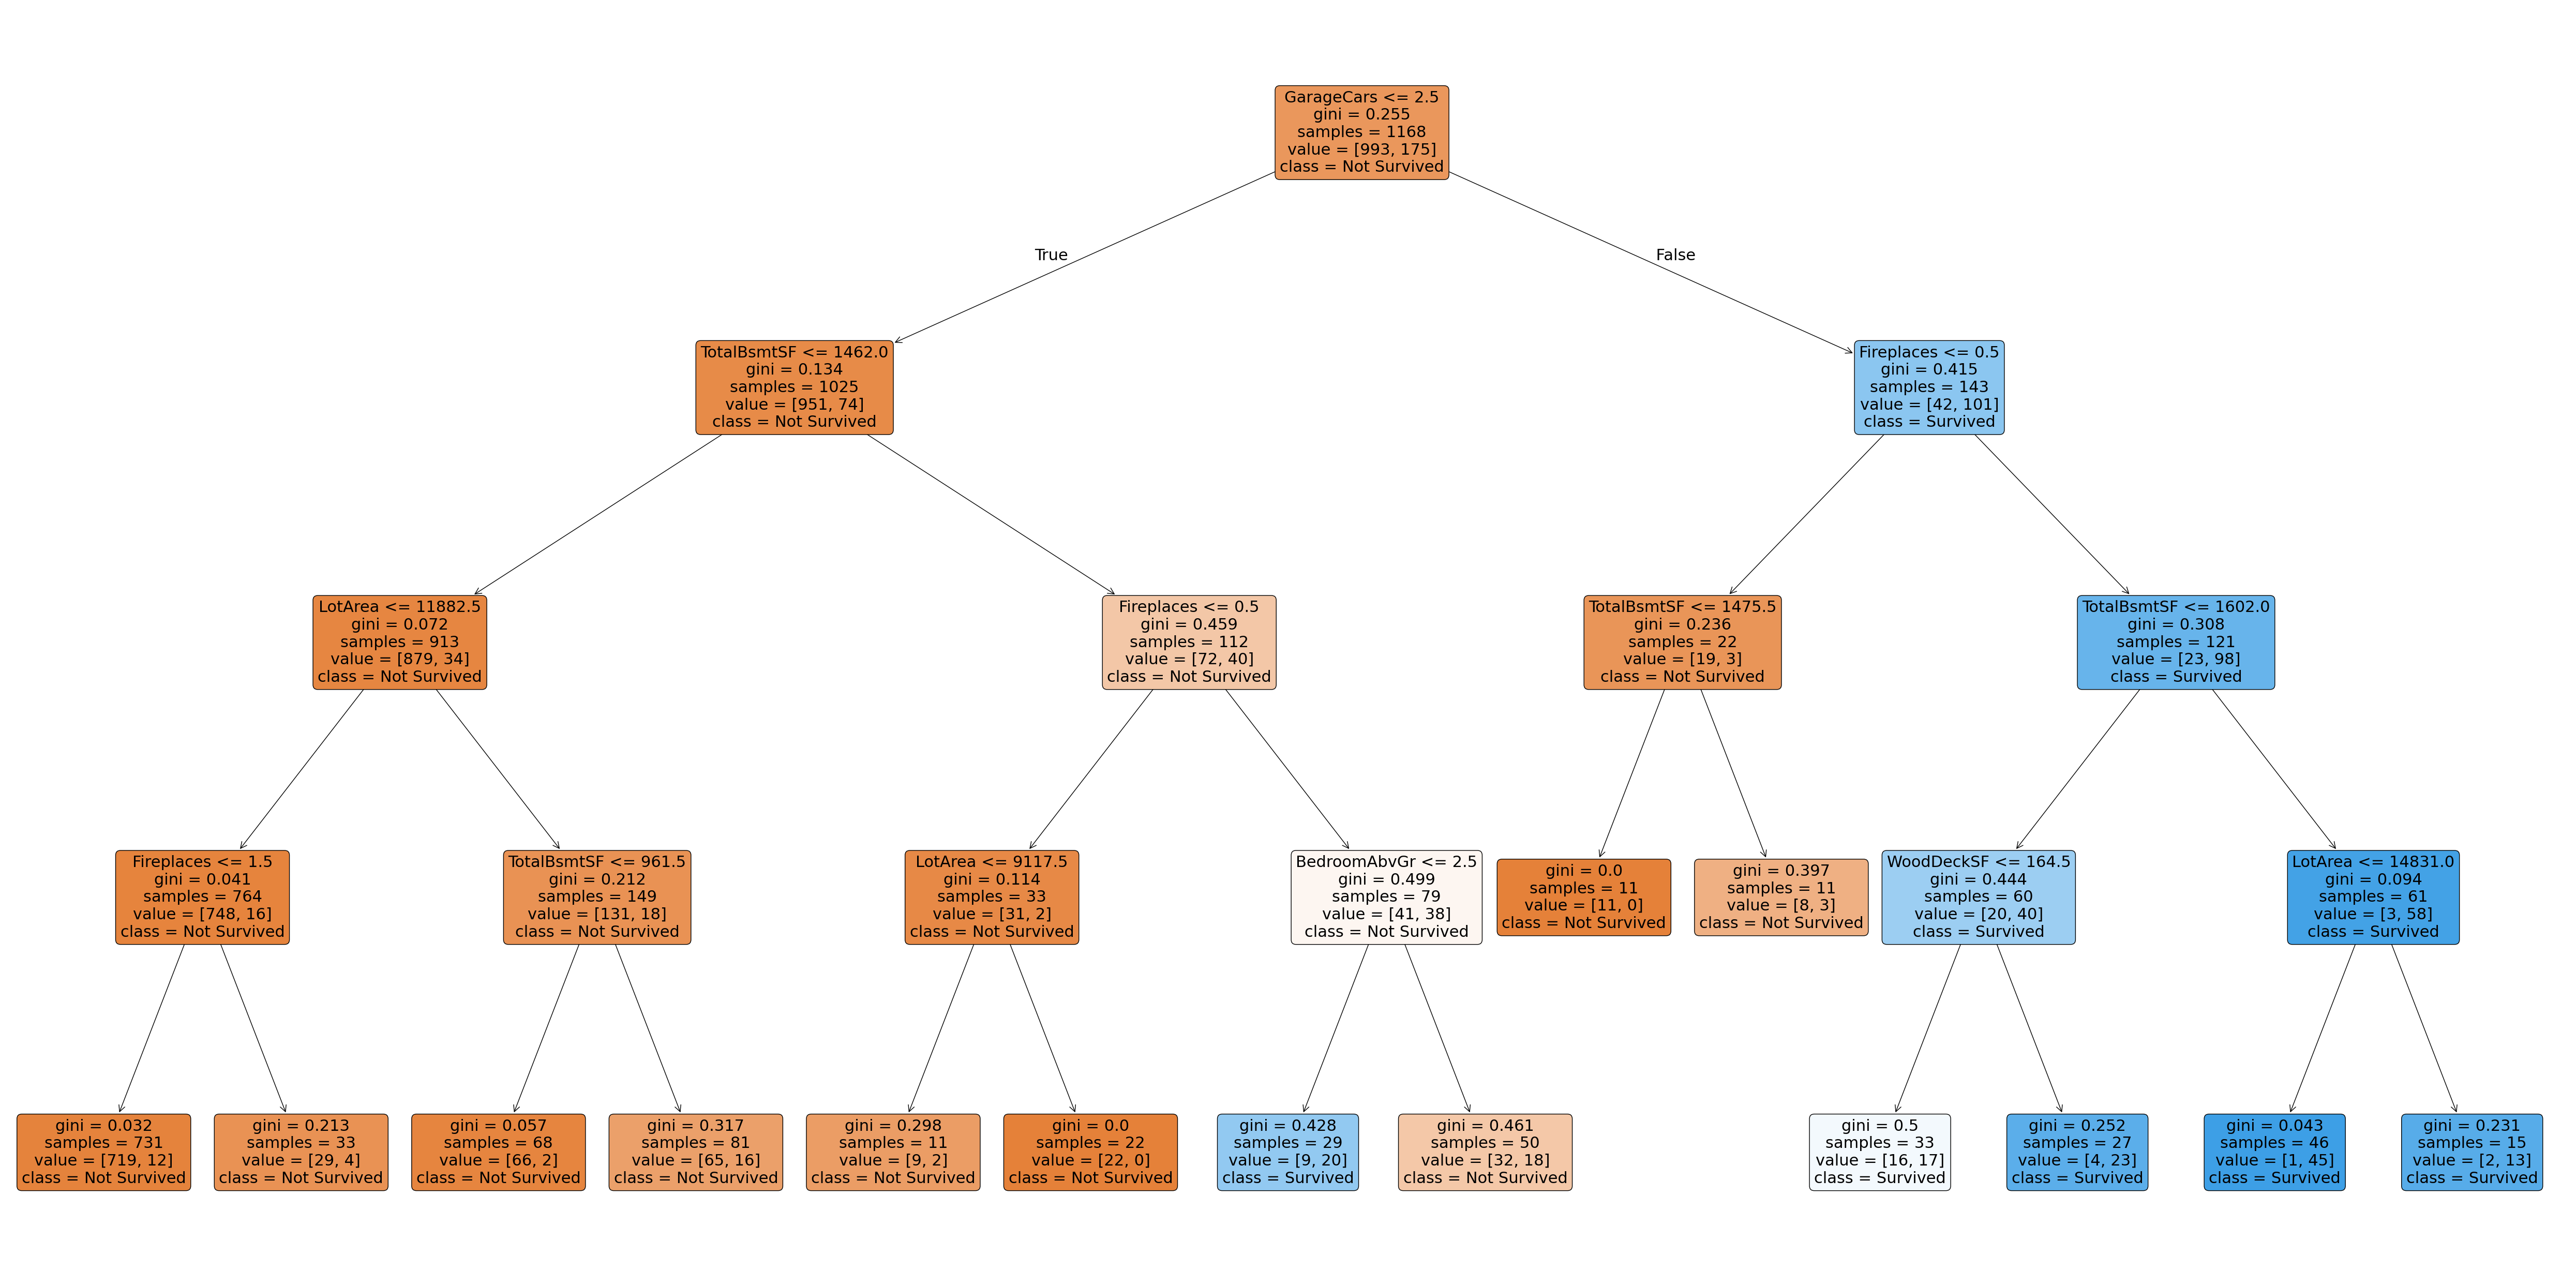

In [557]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
    my_tree2,                          # Decision tree model to visualize
    filled=True,                      # Whether to fill nodes with colors based on majority class
    rounded=True,                     # Whether to round the corners of the nodes
    class_names=['Not Survived','Survived'],  # Names of the classes for the target variable
    feature_names=x2.columns       # Names of the features (columns) in your dataset
);

In [558]:
my_tree3 = DecisionTreeClassifier(max_depth=5,
                                 min_samples_leaf=3
                                 )

my_tree3.fit(X = X_imputed_train3,
            y = y_train3)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## DecisionForest

In [584]:
from sklearn.ensemble import RandomForestClassifier #100 trees in parralel

In [586]:
forest = RandomForestClassifier()

## Pipeline

In [559]:
from sklearn.pipeline import make_pipeline

In [560]:
imputer = SimpleImputer(strategy="median")
dtree = DecisionTreeClassifier(max_depth=4,
                               min_samples_leaf=10,
                               random_state=42)

pipe = make_pipeline(imputer, dtree)

In [561]:
pipe.fit(X_train3, y_train3)

,steps,"[('simpleimputer', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,criterion,'gini'


In [562]:
set_config(display="text")
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,
                                        random_state=42))])

In [563]:
set_config(display="diagram")
pipe

,steps,"[('simpleimputer', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,criterion,'gini'


In [564]:
pipe3 = pipe

In [565]:
# select categorical and numerical column names
X_cat_columns = x4.select_dtypes(exclude="number").columns
X_num_columns = x4.select_dtypes(include="number").columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant",
                  fill_value="N_A"),
    OneHotEncoder(sparse_output=False,
                  handle_unknown='ignore')
)

### Scaler

In [566]:
from sklearn.preprocessing import MinMaxScaler

In [567]:
scaler = MinMaxScaler()

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(X_num_imputed4, scaler) #does not take []
numeric_pipe

,steps,"[('dataframe', ...), ('minmaxscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,dataframe,LotArea...s x 9 columns]
,minmaxscaler,MinMaxScaler()
,minmaxscaler__clip,False
,minmaxscaler__copy,True
,minmaxscaler__feature_range,"(0, ...)"


### Column_transformer

In [ ]:
from sklearn.compose import make_column_transformer

In [579]:
X_cat_columns = x4.select_dtypes(exclude="number").columns
X_num_columns = x4.select_dtypes(include="number").columns

In [580]:
preprocessor = make_column_transformer(
    (numeric_pipe, X_num_columns),
    (categoric_pipe, X_cat_columns)
)

In [593]:
full_pipeline = make_pipeline(preprocessor,
                              forest)

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid3 = {
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2)
    }

In [ ]:
search3 = GridSearchCV(pipe3, # you have defined this beforehand
                      param_grid3, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use,
                      #n_jobs=-1, # uses all available cores of the CPU to run faster (warning: may slow down other applications)
                      verbose=1) # we want informative outputs during the training process, try changing it to 2 and see what happens

In [ ]:
search3.fit(X_train3, y_train3)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'decisiontreeclassifier__max_depth': range(2, 12), 'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2)}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,missing_values,nan


In [ ]:
search3.best_params_

{'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 3}

In [ ]:
search3.best_score_

np.float64(0.9220975019258282)

In [ ]:
# define parameter grid
param_grid = {
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train4, y_train4)

scores = {"dtree" : search.best_score_}

scores

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'dtree': np.float64(0.9118337551813948)}

## Error Analysis

In [612]:
from sklearn.metrics import recall_score, precision_score, f1_score, cohen_kappa_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# test accuracy
# test_pred = search.predict(X_test)
# test_acc = accuracy_score(y_test, test_pred)
# print(test_acc)

In [ ]:
# ConfusionMatrixDisplay.from_estimator(
#   search,
#   X_test,
#   y_test,
#   display_labels=['Not Survied', 'Survived']
# );

## Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
dummy_train_pred = dummy_model1.predict(X_train1)

In [ ]:
train_accuracy = accuracy_score(y_true = y_train1,
                                y_pred = dummy_train_pred)

round(train_accuracy, 2)

0.62

In [ ]:
dummy_test_pred = dummy_model1.predict(X_test1)

test_accuracy = accuracy_score(y_true = y_test1,
                               y_pred = dummy_test_pred)

round(test_accuracy, 2)

0.62

### Tests for data2

In [ ]:
# make predictions
y_pred_tree_train2 = my_tree2.predict(X_imputed_train2)

In [ ]:
# Check accuracy on the train set

accuracy_score(y_true = y_train2,
               y_pred = y_pred_tree_train2
              )

0.9238013698630136

In [ ]:
y_pred_tree_test2 = my_tree2.predict(X_imputed_test2)

accuracy_score(y_true = y_test2,
               y_pred = y_pred_tree_test2
              )

0.9212328767123288

### Tests for data3

In [ ]:
# If we were to not tune the model
baseline_acc = y3.value_counts(normalize=True).values.max()
baseline_acc

np.float64(0.8513698630136987)

In [ ]:
train_pred3 = my_tree3.predict(X_imputed_train3)

accuracy_score(y_true = y_train3,
               y_pred = train_pred3)

0.9392123287671232

In [ ]:
test_pred3 = my_tree3.predict(X_imputed_test3)

accuracy_score(y_true = y_test3,
               y_pred = test_pred3)

0.9246575342465754

In [ ]:
pipe3.predict(X_test3)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
# training accuracy
train_pred = search3.predict(X_train3)

accuracy_score(y_train3, train_pred)

0.9392123287671232

In [ ]:
# testing accuracy
test_pred = search3.predict(X_test3)

accuracy_score(y_test3, test_pred)

0.9246575342465754

## CrossValidate

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
cross_validate(my_tree3, X_imputed_train3, y_train3, cv=10)

{'fit_time': array([0.00372148, 0.00299311, 0.00310874, 0.00296593, 0.00322461,
        0.00297976, 0.00297093, 0.00308061, 0.00301981, 0.00283051]),
 'score_time': array([0.00132132, 0.00128508, 0.00123239, 0.00134254, 0.00131536,
        0.00119162, 0.0011735 , 0.00139403, 0.0011549 , 0.00109196]),
 'test_score': array([0.88888889, 0.90598291, 0.92307692, 0.94017094, 0.90598291,
        0.93162393, 0.92307692, 0.94017094, 0.94827586, 0.92241379])}

In [ ]:
# Here you can compare the result with the best_score from the GridSearch
cross_validate(my_tree3, X_imputed_train3, y_train3, cv=10)['test_score'].mean()

np.float64(0.9229664014146775)

In [ ]:
cross_validate(pipe3, X_imputed_train3, y_train3, cv=10)['test_score'].mean()

np.float64(0.9152298850574713)

## End Result

In [ ]:
X_test3["Expensive"] = y_test3
test = X_test3["Expensive"]
test = test.sort_index()

In [ ]:
test.value_counts(normalize=True)*100

Expensive
0    85.616438
1    14.383562
Name: proportion, dtype: float64